# 비즈니스 시나리오

"어떤 한 은행에서 정기예금 계약을 위한 텔레마케팅을 실시.   
오퍼레이터가 과거의 경험에 의거, 잠재고객에게 전화를 걸고 있지만 최근 수 년간 신규고객의 계약 건수가 주춤하고 있고 실패 건수가 눈에 띄는 상태.   
전화를 걸수록 인건비만 늘어나므로 고객 수를 늘리기 위한 대책 필요"

## 목적
계약 건수를 늘리는 것
- 현재 상태: 과거의 경험을 바탕으로 텔레마케팅 실시(정성적)   

- 목표 상태: 데이터를 활용해 계약 잠재력이 높은 고객부터 먼저 텔레마케팅 실시(정량적)

## 분석 목표
계약 잠재력이 높은 고객을 발견하는 것

# 1. 데이터 이해
파일: bank.csv   
변수 설명
- age : 나이   
- job : 직종   
- matrial : 결혼 이력   
- education :학력   
- default : 채무 불이행 유무
- balance : 연간 평균 잔고
- housing : 주택 대출 유무   
- loan : 개인 대출 유무
- contact : 연락 수단
- day : 마지막으로 접촉한 날짜
- month : 마지막으로 접촉한 달
- duration : 접촉한 시간
- campaign : 이번 캠페인으로 접촉한 회수
- pdays : 지난 번 캠페인에서 마지막으로 접촉한 후의 경과 시간
- previous : 이번 캠페인 이전에 접촉한 회수
- poutcome : 지난 번 캠페인의 성공 유무
- y : 예금 신청 유무

## 1.1 데이터 읽기와 확인

In [1]:
# pandas 임포트 및 파일 업로드
import pandas as pd

bank_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/전처리/chap3-4/data/data/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [2]:
# 연습 1) 끝에서 10행까지 표시
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [3]:
# 데이터 행, 열 갯수 확인
bank_df.shape

(7234, 17)

In [4]:
# 데이터 타입 확인
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## 1.2 결손값 확인

In [5]:
# 결손값 포함 유무 확인

# 행 방향
bank_df.isnull().any(axis = 1)

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool

In [6]:
# 열 방향
bank_df.isnull().any(axis = 0)

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool

In [7]:
# 결손값 개수 파악

# 행 방향
bank_df.isnull().sum(axis = 1)

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64

In [8]:
# 열 방향
bank_df.isnull().sum(axis = 0)

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

In [9]:
# 연습 2) 행 기준 결손값 개수를 많은 순서대로 정렬
bank_df.isnull().sum(axis = 1).sort_values(ascending = False)

1837    4
1629    4
139     4
1814    4
1670    4
       ..
5919    0
5918    0
5917    0
5916    0
5379    0
Length: 7234, dtype: int64

## 1-3. 통계량 계산

In [11]:
# 데이터형이 수치인 항목의 통계량 계산
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


통계량 항목 )   
- count : 건수
- mean : 평균값
- std : 표준편차
- min : 최솟값
- 25% : 제1사분위값
- 50% : 제2사분위값/중앙치
- 75% : 제3사분위값
- max : 최댓값

In [12]:
# 연습 3) 데이터형이 문자열(object)인 항목에 대해 각종 통계량 계산
bank_df.describe(include = [object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


## 1-4. 데이터 시각화 (1)

- Matplotlib 사용, 데이터 시각화 및 분포 확인
- 'age' 항목 히스토그램 작성

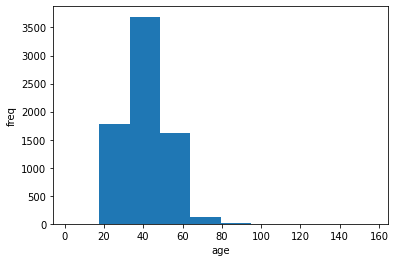

In [13]:
# 'age' 히스토그램 작성
import matplotlib.pyplot as plt # matplotlib 임포트
%matplotlib inline

plt.hist(bank_df['age']) # hist: 히스토그램 작성
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

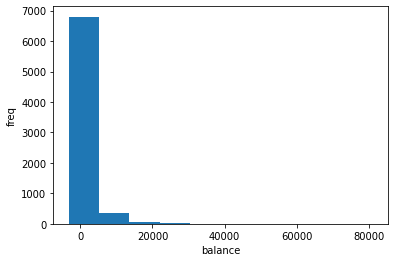

In [14]:
# 연습 4) 그 밖의 수치 항목(balance, day, duration, campaign, pdays, previous) 히스토그램 작성, 분포 확인

# 연습 4-1) 'balance'
plt.hist(bank_df['balance'])
plt.xlabel('balance')
plt.ylabel('freq')
plt.show()

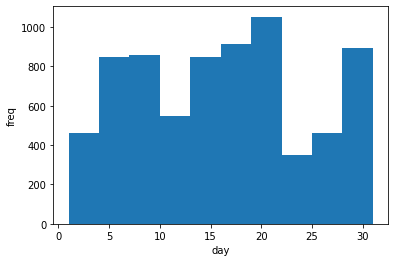

In [15]:
# 연습 4-2) 'day'
plt.hist(bank_df['day'])
plt.xlabel('day')
plt.ylabel('freq')
plt.show()

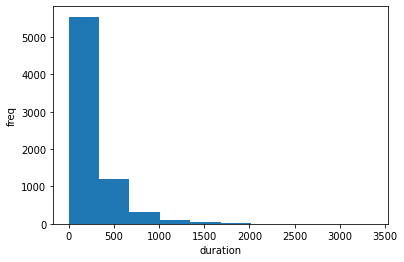

In [16]:
# 연습 4-3) 'duration'
plt.hist(bank_df['duration'])
plt.xlabel('duration')
plt.ylabel('freq')
plt.show()

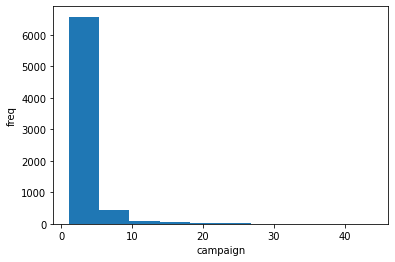

In [17]:
# 연습 4-4) 'campaign'
plt.hist(bank_df['campaign'])
plt.xlabel('campaign')
plt.ylabel('freq')
plt.show()

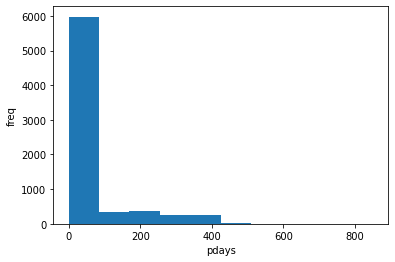

In [18]:
# 연습 4-5) 'pdays'
plt.hist(bank_df['pdays'])
plt.xlabel('pdays')
plt.ylabel('freq')
plt.show()

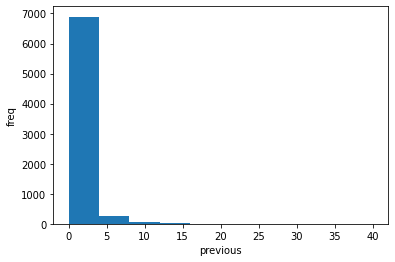

In [19]:
# 연습 4-6) 'previous'
plt.hist(bank_df['previous'])
plt.xlabel('previous')
plt.ylabel('freq')
plt.show()

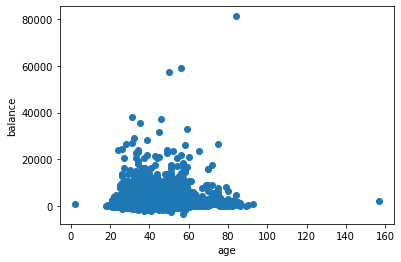

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [20]:
# age, balance 산포도 작성 및 항목 관련성 확인
plt.scatter(bank_df['age'], bank_df['balance'])
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

bank_df[['age', 'balance']].corr()

- 'age'와 'balance'의 상관계수: 0.112364 → 관련성이 거의 없음
- 상관계수 : -1부터 1 사이의 값. 절댓값이 클수록 관련성이 강함.

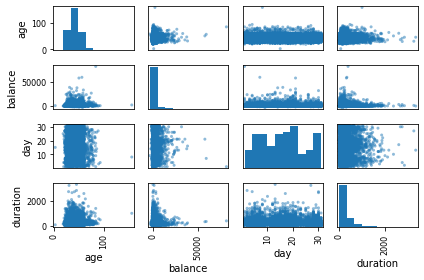

In [21]:
# 연습 5) age, balance, day, duration에 대해 산포도 행렬 작성, 두 가지 항목의 관계성 확인
pd.plotting.scatter_matrix(bank_df[['age', 'balance', 'day', 'duration']])
plt.tight_layout()
plt.show()

In [22]:
# 문자열 항목 중 job의 원 그래프 작성(1)
# job의 값별 비율 계산
bank_df['job'].value_counts(ascending = False, normalize = True)

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64

- normalize = True : 발생횟수가 1이 되도록 정규화

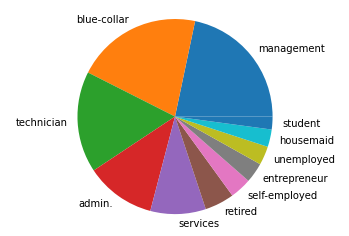

In [25]:
# 문자열 항목 중 job의 원 그래프 작성(2)
job_label = bank_df['job'].value_counts(ascending = False, normalize = True).index # 위에서 구한 값의 레이블 저장
job_val = bank_df['job'].value_counts(ascending = False, normalize = True).values # 위에서 구한 값의 비율값 저장

plt.pie(job_val, labels = job_label)
plt.axis('equal') # 원의 가로 세로 비율 동일하게 고정
plt.show()

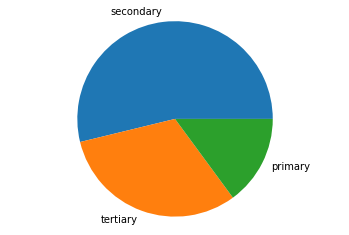

In [26]:
# 연습 6) 다른 문자열 항목도 마찬가지로 각 항목의 값별로 비율과 원 그래프 작성, 데이터 분포 확인
# education
edu_label = bank_df['education'].value_counts(ascending = False, normalize = True).index 
edu_val = bank_df['education'].value_counts(ascending = False, normalize = True).values 

plt.pie(edu_val, labels = edu_label)
plt.axis('equal') 
plt.show()

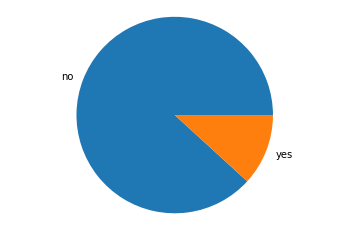

In [27]:
# y의 원 그래프 작성 및 데이터 분포 확인
y_label = bank_df['y'].value_counts(ascending = False, normalize = True).index
y_val = bank_df['y'].value_counts(ascending = False, normalize = True).values

plt.pie(y_val, labels = y_label)
plt.axis('equal')
plt.show()

- 'no (예금 신청 없음)'가 'yes (예금 신청 있음)' 에 비해 압도적으로 많음 → 불균형 데이터
- 그대로 사용할 경우 다수 클래스만 검출되는 모델이 만들어짐

## 1-5. 데이터 시각화 (2)

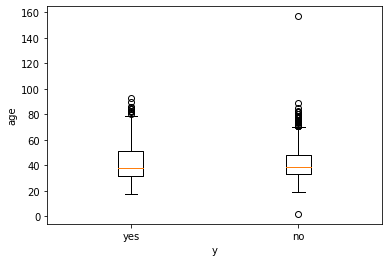

In [32]:
# 목적변수 y에 대한 데이터 분포 확인
y_yes = bank_df[bank_df['y'] == 'yes']
y_no = bank_df[bank_df['y'] == 'no']
y_age = [y_yes['age'], y_no['age']]

plt.boxplot(y_age) # boxplot: 데이터의 분산 상태를 표현하기 적합
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
plt.setp(ax, xticklabels = ['yes', 'no'])
plt.show()

- 박스 안의 선: 데이터 중앙치
- 박스의 상하선: 제3사분위수, 제1사분위수
- 위쪽 수염: 최대치
- 아래쪽 수염: 최소치
- 'no' 데이터: 이상치 포함 → 추후에 제외해야 함